<a href="https://colab.research.google.com/github/Leandrogbrito/Projeto-pratico-de-dados/blob/main/2projetpratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Leandrogbrito/Projeto-pratico-de-dados/main/base-alugueis-sp.csv'
df = pd.read_csv(url)

In [47]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [48]:
# Corrigindo os endereços incompletos
df['street'] = df['address'].str.split(',').str.get(0)
df['district_from_address'] = df['address'].str.split(',').str.get(1)
df['city'] = df['address'].str.split(',').str.get(-2).str.split(' - ').str.get(0)
df['state'] = df['address'].str.split(',').str.get(-2).str.split(' - ').str.get(1)

df['district'] = df.apply(lambda row: row['district_from_address'] if row['district_from_address'] == row['district'] else row['district'], axis=1)

In [49]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total,street,district_from_address,city,state
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,Rua Herval,NaN,NaN,NaN
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,Avenida São Miguel,NaN,NaN,NaN
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,Rua Oscar Freire,NaN,NaN,NaN
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,Rua Júlio Sayago,NaN,NaN,NaN
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,Rua Barata Ribeiro,NaN,NaN,NaN


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   address                11657 non-null  object
 1   district               11657 non-null  object
 2   area                   11657 non-null  int64 
 3   bedrooms               11657 non-null  int64 
 4   garage                 11657 non-null  int64 
 5   type                   11657 non-null  object
 6   rent                   11657 non-null  int64 
 7   total                  11657 non-null  int64 
 8   street                 11657 non-null  object
 9   district_from_address  68 non-null     object
 10  city                   68 non-null     object
 11  state                  21 non-null     object
dtypes: int64(5), object(7)
memory usage: 1.1+ MB


In [51]:
# Ajustando a categorização do tipo de imóvel e separando studio e kitnet usando o numero de quarto como referênc
#df['main_type'] = df['type'].str.split(' e ').str.get(0)
df['main_type'] = df.apply(lambda row: 'kitnet' if row['type'] == 'Studio e kitnet' and row['bedrooms'] > 0 else 'studio' if row['type'] == 'Studio e kitnet' and row['bedrooms'] == 0 else row['type'], axis=1)

In [52]:
df.head(100)


,address,district,area,bedrooms,garage,type,rent,total,street,district_from_address,city,state,main_type
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,Rua Herval,NaN,NaN,NaN,kitnet
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,Avenida São Miguel,NaN,NaN,NaN,kitnet
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,Rua Oscar Freire,NaN,NaN,NaN,Apartamento
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,Rua Júlio Sayago,NaN,NaN,NaN,Casa em condomínio
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,Rua Barata Ribeiro,NaN,NaN,NaN,kitnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Rua Fonseca da Costa,Bosque da Saúde,209,3,2,Casa,6000,6674,Rua Fonseca da Costa,NaN,NaN,NaN,Casa
96,Rua Afonso Morsch,Vila Constança,75,2,1,Casa em condomínio,4000,4067,Rua Afonso Morsch,NaN,NaN,NaN,Casa em condomínio
97,Rua Bartholomeu do Canto,Vila Palmeiras,31,1,0,Apartamento,1700,2166,Rua Bartholomeu do Canto,NaN,NaN,NaN,Apartamento
98,Rua Natividade Saldanha,São Lucas,19,0,0,Studio e kitnet,850,1052,Rua Natividade Saldanha,NaN,NaN,NaN,studio


In [53]:
# Combinando as informações relevantes do endereço
df['address_complete'] = df['street'] + ', ' + df['district'] + ' - ' + df['city'] + ' - ' + df['state']

In [54]:
df


,address,district,area,bedrooms,garage,type,rent,total,street,district_from_address,city,state,main_type,address_complete
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,Rua Herval,NaN,NaN,NaN,kitnet,NaN
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,Avenida São Miguel,NaN,NaN,NaN,kitnet,NaN
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,Rua Oscar Freire,NaN,NaN,NaN,Apartamento,NaN
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,Rua Júlio Sayago,NaN,NaN,NaN,Casa em condomínio,NaN
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,Rua Barata Ribeiro,NaN,NaN,NaN,kitnet,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,Avenida Adolfo Pinheiro,NaN,NaN,NaN,Apartamento,NaN
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,Rua Professor Alexandre Correia,NaN,NaN,NaN,Apartamento,NaN
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,Rua Abílio Borin,NaN,NaN,NaN,Apartamento,NaN
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,Rua Forte William,NaN,NaN,NaN,Apartamento,NaN


In [55]:
df.drop(['district_from_address', 'street', 'city', 'state'], axis=1, inplace=True)

In [56]:
print(df.head(10))


                  address           district  area  bedrooms  garage  \
0              Rua Herval         Belenzinho    21         1       0   
1      Avenida São Miguel       Vila Marieta    15         1       1   
2        Rua Oscar Freire          Pinheiros    18         1       0   
3        Rua Júlio Sayago            Vila Ré    56         2       2   
4      Rua Barata Ribeiro         Bela Vista    19         1       0   
5      Rua Domingos Paiva               Brás    50         2       1   
6          Rua Guararapes  Brooklin Paulista    72         2       1   
7   Avenida Cásper Líbero             Centro    26         1       0   
8  Rua José Peres Campelo            Piqueri    32         2       0   
9           Rua Guaperuvu    Vila Aricanduva    36         1       0   

                 type  rent  total           main_type address_complete  
0     Studio e kitnet  2400   2939              kitnet              NaN  
1     Studio e kitnet  1030   1345              kitnet     

In [57]:
df.describe()


,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [58]:
# Encontrar as linhas com área igual a zero
linhas_com_area_zero = df[df['area'] == 0]
print("Linhas com área zero:")
print(linhas_com_area_zero)

Linhas com área zero:
                    address                district  area  bedrooms  garage  \
2983           Rua Relíquia  Jardim das Laranjeiras     0         2       1   
7085  Rua Edmundo de Amicis                 Morumbi     0         3       2   

             type  rent  total    main_type address_complete  
2983  Apartamento  1600   2569  Apartamento              NaN  
7085         Casa  3200   3351         Casa              NaN  


In [59]:
# Remover as linhas com área igual a zero
df = df[df['area'] != 0]


In [60]:
df.describe()

,area,bedrooms,garage,rent,total
count,11655.000000,11655.000000,11655.000000,11655.000000,11655.000000
mean,84.670184,1.966195,1.060317,3250.960789,4080.222823
std,74.018579,0.931343,1.132412,2650.894847,3352.731905
min,1.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.500000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [ ]:
df.drop('address_complete', axis=1, inplace=True)
#a coluna removida não tinha dados validos

In [ ]:
df.drop('type', axis=1, inplace=True)
#Depois que dividir studios e kitnet essa coluna não fazia sentido

In [66]:
print (df)


                              Endereço                   Bairro  Área  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       Quartos  Garagem  Aluguel  Total                Tipo  
0            1        0     2400   2939              kitnet  

In [ ]:
df.rename(columns={'address': 'Endereço', 'district': 'Bairro', 'area' :'Área', 'bedrooms' : 'Quartos', 'garage' : 'Garagem', 'rent' : 'Aluguel', 'total' : 'Total', 'main_type' : 'Tipo' }, inplace=True)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11655 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Endereço  11655 non-null  object
 1   Bairro    11655 non-null  object
 2   Área      11655 non-null  int64 
 3   Quartos   11655 non-null  int64 
 4   Garagem   11655 non-null  int64 
 5   Aluguel   11655 non-null  int64 
 6   Total     11655 non-null  int64 
 7   Tipo      11655 non-null  object
dtypes: int64(5), object(3)
memory usage: 819.5+ KB


In [71]:
# Nova ordem das colunas
new_order = ['Tipo', 'Endereço', 'Bairro', 'Área', 'Quartos', 'Garagem', 'Aluguel', 'Total']

# Reordenar as colunas do DataFrame
df = df[new_order]

print(df)


                     Tipo                         Endereço  \
0                  kitnet                       Rua Herval   
1                  kitnet               Avenida São Miguel   
2             Apartamento                 Rua Oscar Freire   
3      Casa em condomínio                 Rua Júlio Sayago   
4                  kitnet               Rua Barata Ribeiro   
...                   ...                              ...   
11652         Apartamento          Avenida Adolfo Pinheiro   
11653         Apartamento  Rua Professor Alexandre Correia   
11654         Apartamento                 Rua Abílio Borin   
11655         Apartamento                Rua Forte William   
11656                Casa              Rua Alexandre Dumas   

                        Bairro  Área  Quartos  Garagem  Aluguel  Total  
0                   Belenzinho    21        1        0     2400   2939  
1                 Vila Marieta    15        1        1     1030   1345  
2                    Pinheiros    18



 Análise Descritiva:


In [74]:
# Calcular estatísticas descritivas básicas
estatisticas_basicas = df.describe()
print("\nEstatísticas Descritivas:\n", estatisticas_basicas)


Estatísticas Descritivas:
                Área       Quartos       Garagem       Aluguel         Total
count  11655.000000  11655.000000  11655.000000  11655.000000  11655.000000
mean      84.670184      1.966195      1.060317   3250.960789   4080.222823
std       74.018579      0.931343      1.132412   2650.894847   3352.731905
min        1.000000      0.000000      0.000000    500.000000    509.000000
25%       40.000000      1.000000      0.000000   1590.000000   1996.000000
50%       60.000000      2.000000      1.000000   2415.000000   3057.000000
75%       96.000000      3.000000      2.000000   3800.000000   4774.500000
max      580.000000      6.000000      6.000000  25000.000000  28700.000000


In [75]:
# Calcular estatísticas para variáveis categóricas
estatisticas_categoricas = df.describe(include=['O'])

print("\nEstatísticas Categóricas:\n", estatisticas_categoricas)


Estatísticas Categóricas:
                Tipo           Endereço      Bairro
count         11655              11655       11655
unique            5               5347        1199
top     Apartamento  Rua da Consolação  Bela Vista
freq           7193                 49         352


In [76]:
# Verificar a distribuição de uma variável numérica específica, por exemplo, 'Aluguel'
aluguel_descricao = df['Aluguel'].describe()

print("\nDescrição da Coluna 'Aluguel':\n", aluguel_descricao)


Descrição da Coluna 'Aluguel':
 count    11655.000000
mean      3250.960789
std       2650.894847
min        500.000000
25%       1590.000000
50%       2415.000000
75%       3800.000000
max      25000.000000
Name: Aluguel, dtype: float64


In [81]:
# Identificar tendências
# Calcular estatísticas individuais para a coluna 'Aluguel'
media_aluguel = df['Aluguel'].mean()
mediana_aluguel = df['Aluguel'].median()
desvio_padrao_aluguel = df['Aluguel'].std()
min_aluguel = df['Aluguel'].min()
max_aluguel = df['Aluguel'].max()

print("\nMédia do Aluguel:", media_aluguel)
print("Mediana do Aluguel:", mediana_aluguel)
print("Desvio Padrão do Aluguel:", desvio_padrao_aluguel)
print("Aluguel Mínimo:", min_aluguel)
print("Aluguel Máximo:", max_aluguel)


Média do Aluguel: 3250.9607893607895
Mediana do Aluguel: 2415.0
Desvio Padrão do Aluguel: 2650.894846617321
Aluguel Mínimo: 500
Aluguel Máximo: 25000


In [77]:

import matplotlib.pyplot as plt
import seaborn as sns

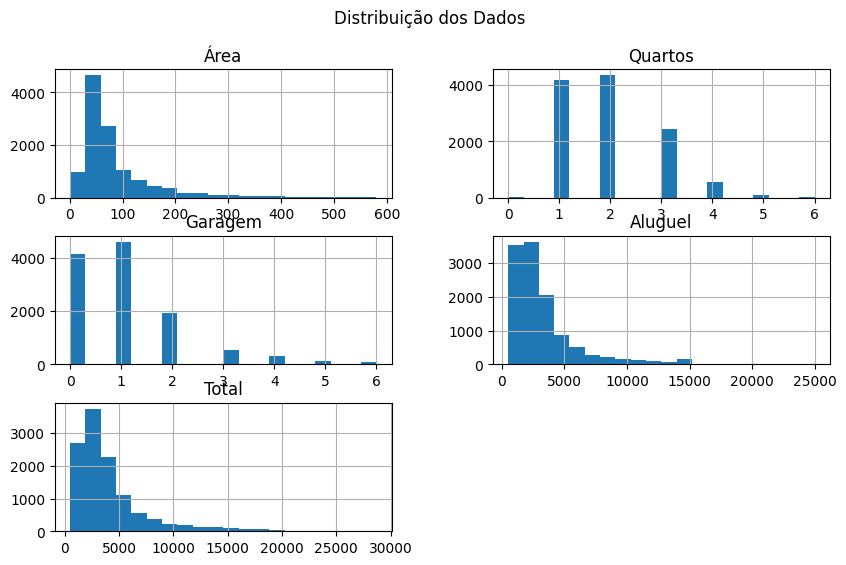

             Área   Quartos   Garagem   Aluguel     Total
Área     1.000000  0.728137  0.733584  0.667196  0.652143
Quartos  0.728137  1.000000  0.656881  0.531205  0.526029
Garagem  0.733584  0.656881  1.000000  0.617304  0.618019
Aluguel  0.667196  0.531205  0.617304  1.000000  0.978111
Total    0.652143  0.526029  0.618019  0.978111  1.000000


In [96]:
# Plotar histogramas para visualizar distribuições
df.hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribuição dos Dados")
plt.show()

# Calcular matriz de correlação
correlacao = df.corr(numeric_only=True)

# Exibir a matriz de correlação
print(correlacao)


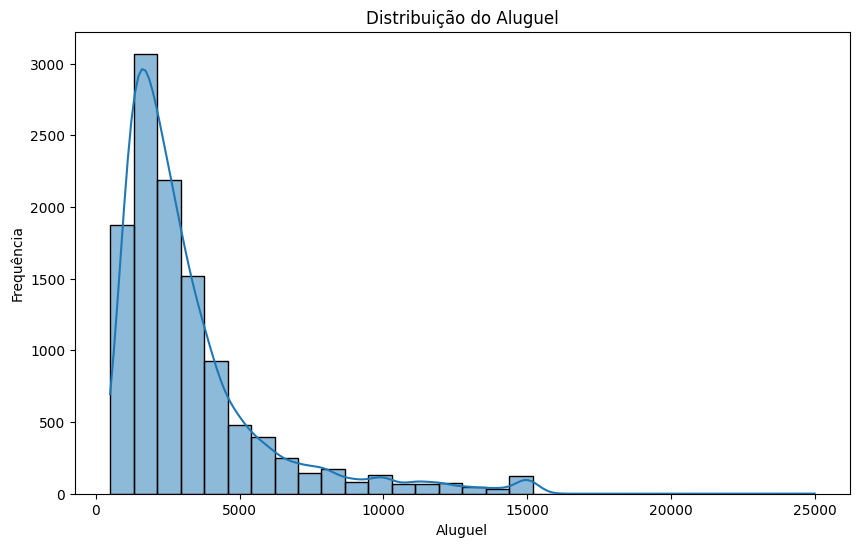

In [78]:
# Histograma do aluguel
plt.figure(figsize=(10, 6))
sns.histplot(df['Aluguel'], bins=30, kde=True)
plt.title('Distribuição do Aluguel')
plt.xlabel('Aluguel')
plt.ylabel('Frequência')
plt.show()


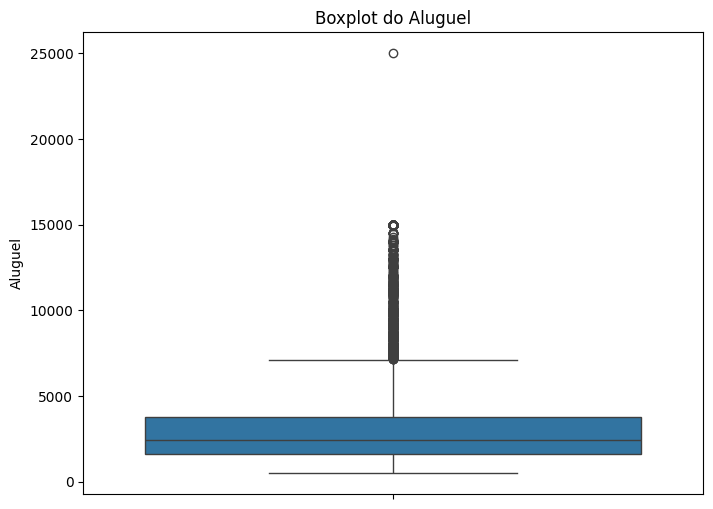

In [82]:
# Boxplot do aluguel
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Aluguel'])
plt.title('Boxplot do Aluguel')
plt.ylabel('Aluguel')
plt.show()


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Suponha que você tenha um DataFrame chamado 'dados' com colunas 'quartos' e 'preço_aluguel'
X = df['Quartos'].values.reshape(-1, 1)
y = df['Aluguel'].values.reshape(-1, 1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Criar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões
y_pred = regressor.predict(X_test)

# Avaliar o modelo (RMSE e R2)
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

# Equação da reta de regressão
a = regressor.intercept_[0]
b = regressor.coef_[0][0]
print(f"preço = {a:.2f} + ({b:.2f} * quartos)")


RMSE: 2280.45
R2: 0.26
preço = 249.41 + (1515.16 * quartos)


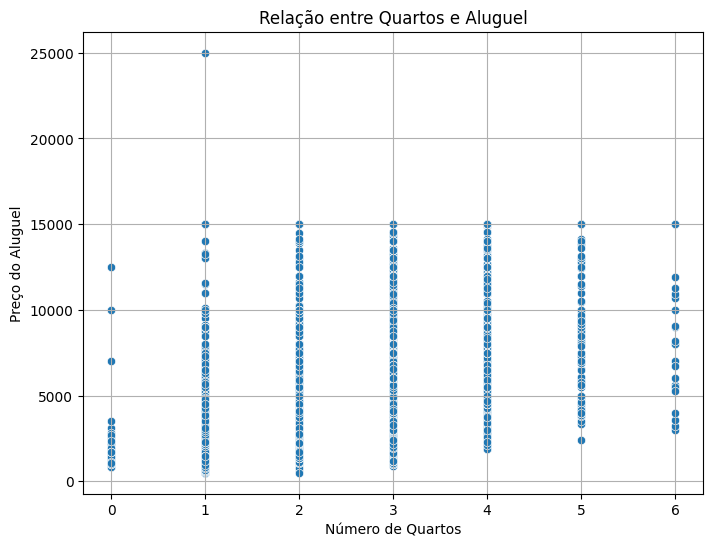

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que você tenha um DataFrame chamado 'dados' com colunas 'quartos' e 'preço_aluguel'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quartos', y='Aluguel', data=df)
plt.title("Relação entre Quartos e Aluguel")
plt.xlabel("Número de Quartos")
plt.ylabel("Preço do Aluguel")
plt.grid(True)
plt.show()
